# **forecast_kinneret**

In [ ]:
# ================================
# 📁 Input file required:
# - 'kinneret_levels.json' → a JSON file with two columns: 'date' (as string) and 'level' (float)
#
# ⚙️ What this code does:
# - Loads and cleans water level data for the Kinneret (Sea of Galilee)
# - Fits an ARIMA time series model with parameters (2,1,1)
# - Generates water level forecasts for the next 1, 3, 6, and 12 months (starting July 2025)
# - Saves the forecast results into a single structured JSON file
#
# 📤 Output:
# - 'forecast_kinneret_multi.json' → contains a list of forecasted water levels by date and range
# - Example:
#   [
#     {"date": "2025-07-01", "forecast_level": -211.32, "range": 3},
#     ...
#   ]
# ================================

# 📦 Install required packages
!pip install pandas matplotlib statsmodels

# 📥 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 📂 Load the Kinneret dataset
df = pd.read_json("kinneret_levels.json")

# 🧹 Clean and prepare data
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")
df["level"] = df["level"].astype(float)
ts = df.set_index("date")["level"]

# 📈 Fit ARIMA model
model = ARIMA(ts, order=(2, 1, 1))
model_fit = model.fit()

# 🔮 Forecast for multiple ranges
forecast_ranges = [1, 3, 6, 12]
all_forecasts = []

for steps in forecast_ranges:
    forecast = model_fit.forecast(steps=steps)
    last_date = ts.index.max()
    future_dates = pd.date_range(start="2025-07-01", periods=steps, freq="MS")

    for i in range(steps):
        all_forecasts.append({
            "date": future_dates[i].strftime("%Y-%m-%d"),
            "forecast_level": round(forecast.iloc[i], 2),  # ✅ Use .iloc to access by position
            "range": steps
        })

# 💾 Save to JSON
with open("forecast_kinneret_multi.json", "w") as f:
    import json
    json.dump(all_forecasts, f, indent=2)

# ✅ Done! The file 'forecast_kinneret_multi.json' contains all forecast ranges with the structure you need for React
from google.colab import files
files.download("forecast_kinneret_multi.json")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Trend Analysis for WaterLevel of Kinneret**

In [ ]:
# ================================
# 📁 Input file required:
# - 'kinneret_water_levels_yearly.json' → JSON file with at least two fields: 'date' (string format) and 'level' (float).
#   The file should contain one entry per year.

# ⚙️ What this code does:
# - Uploads and reads a yearly water level dataset for the Kinneret
# - Converts the dataset to a time-indexed format using a numeric "year_index"
# - Fits a linear regression model to detect long-term trend (level = a*x + b)
# - Computes and prints the regression equation and R² score
# - Adds predicted (fitted) values to the dataset
# - Formats the output as a list of dictionaries with 'year', 'level', and 'fitted'
# - Saves the result as a JSON file for use in the frontend (e.g. React)

# 📤 Output:
# - 'trend_yearly_kinneret.json' → contains yearly data with actual and predicted water levels
#   Example:
#   [
#     {"year": 2001, "level": -210.15, "fitted": -210.10},
#     ...
#   ]
# ================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import json
from google.colab import files

# === Upload the yearly file ===
uploaded = files.upload()  # Upload `kinneret_water_levels_yearly.json`

# === Read JSON ===
filename = next(iter(uploaded))
df = pd.read_json(filename)

# === Sort and create time index ===
df = df.sort_values(by="date")
df.reset_index(drop=True, inplace=True)
df["year_index"] = np.arange(len(df))

# === Fit linear regression ===
X = df[["year_index"]]
y = df["level"]

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f"📏 Equation: level = {slope:.5f} * year_index + {intercept:.5f}")
print(f"📈 R² Score: {r2:.4f}")

# === Predict fitted values ===
df["fitted"] = model.predict(X)

# === Format for frontend ===
df["year"] = pd.to_datetime(df["date"]).dt.year
output = df[["year", "level", "fitted"]]
output_json = output.to_dict(orient="records")

# === Save and download JSON ===
with open("trend_yearly_kinneret.json", "w") as f:
    json.dump(output_json, f, indent=2)

files.download("trend_yearly_kinneret.json")

Saving kinneret_water_levels_yearly.json to kinneret_water_levels_yearly.json
📏 Equation: level = -0.04101 * year_index + -209.80379
📈 R² Score: 0.2549


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Rainfall and the water level of the Sea of Galilee using linear regression.**

In [ ]:
# ================================
# 📁 Input file required:
# - 'rainfall_vs_water_level.json' → JSON file with fields: 'year', 'rainfall' (independent variable), and 'level' (dependent variable).

# ⚙️ What this code does:
# - Uploads and loads a dataset that links yearly rainfall amounts to water levels of the Kinneret
# - Fits a simple linear regression model to analyze the relationship between rainfall and water level
# - Calculates:
#     • R² score (coefficient of determination)
#     • Pearson correlation coefficient
#     • Regression line equation: Water Level = a × Rainfall + b
# - Adds the predicted (fitted) water levels to the dataset
# - Saves the enriched dataset as a new JSON file

# 📤 Output:
# - 'rainfall_waterlevel_fitted.json' → contains: year, rainfall, actual level, and predicted (fitted) level
#   Example:
#   [
#     {"year": 2001, "rainfall": 450.5, "level": -211.3, "fitted_level": -211.0},
#     ...
#   ]
# ================================

# 📦 Step 1: Install required packages
!pip install pandas scikit-learn scipy

# 📂 Step 2: Upload the JSON file
from google.colab import files
uploaded = files.upload()  # Upload rainfall_vs_water_level.json

# 📊 Step 3: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# 📄 Step 4: Load the JSON file
df = pd.read_json("rainfall_vs_water_level.json")

# 🧮 Step 5: Prepare data
X = df[["rainfall"]]  # Independent variable
y = df["level"]       # Target variable

# 🤖 Step 6: Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 🔍 Step 7: Make predictions and calculate metrics
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
pearson_corr, _ = pearsonr(X.squeeze(), y)

# 🧾 Step 8: Extract model parameters
slope = model.coef_[0]
intercept = model.intercept_

# 🧮 Step 9: Add fitted values to DataFrame
df["fitted_level"] = y_pred

# 📋 Step 10: Display results
print("📈 Regression Equation:")
print(f"Water Level = {slope:.3f} × Rainfall + ({intercept:.2f})")
print(f"\n📊 R²: {r_squared:.3f}")
print(f"🔗 Pearson Correlation (r): {pearson_corr:.3f}")

# 💾 Step 11: Save the enriched data to JSON
output_df = df[["year", "rainfall", "level", "fitted_level"]]
output_df.to_json("rainfall_waterlevel_fitted.json", orient="records", indent=2)

# 📤 Step 12: Offer download
files.download("rainfall_waterlevel_fitted.json")


Saving rainfall_vs_water_level.json to rainfall_vs_water_level.json
📈 Regression Equation:
Water Level = 0.003 × Rainfall + (-212.83)

📊 R²: 0.069
🔗 Pearson Correlation (r): 0.262


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **humidity and the water level of the Sea of Galilee using linear regression.**

📌 Equation: level = -0.0642 * humidity + -207.40
📊 R² Score: 0.0143
📈 Pearson's r: -0.1198


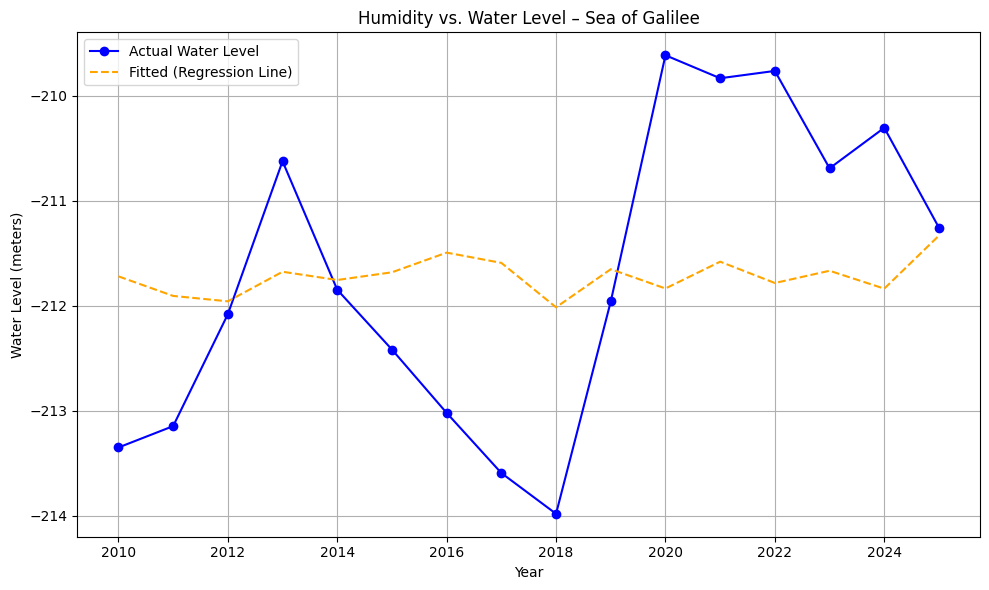

✅ Exported: humidity_vs_water_level_fitted.json


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ================================
# 📁 Input files required:
# 1. 'humidity_data.json' → Contains humidity measurements from Haifa (Technion), with at least 'date' and 'hmd_rlt' fields.
# 2. 'kinneret_water_levels_yearly.json' → Yearly water level data with 'date' and 'level' fields.

# ⚙️ What this code does:
# - Loads humidity readings and averages them per year.
# - Loads yearly Kinneret water level data.
# - Merges both datasets on the 'year' column.
# - Fits a linear regression model to examine the relationship between humidity and water level.
# - Calculates:
#     • Regression equation (slope & intercept)
#     • R² score (goodness of fit)
#     • Pearson correlation coefficient
# - Adds predicted (fitted) values to the dataset.
# - Plots a line graph comparing actual vs. fitted water levels.
# - Exports the final dataset to a JSON file for use in visualization/frontend.

# 📤 Output:
# - 'humidity_vs_water_level_fitted.json' → Contains: year, humidity, actual level, and fitted level
# - Line plot: Humidity vs. Water Level over time
# ================================

# 🌫️ Humidity vs. Water Level – Climate Impact Analysis (Sea of Galilee)

# 📥 1. Load Data

import pandas as pd
import json

# Load humidity data (Haifa Technion)
humidity_path = "humidity_data.json"  # Make sure to upload this file
with open(humidity_path, "r") as f:
    humidity_data = json.load(f)

humidity_df = pd.DataFrame(humidity_data)
humidity_df['date'] = pd.to_datetime(humidity_df['date'], format="%d-%m-%Y %H:%M")
humidity_df['year'] = humidity_df['date'].dt.year
yearly_humidity = humidity_df.groupby('year')['hmd_rlt'].mean().reset_index()
yearly_humidity.rename(columns={'hmd_rlt': 'humidity'}, inplace=True)

# Load water level data
water_path = "kinneret_water_levels_yearly.json"  # Make sure to upload this file too
with open(water_path, "r") as f:
    water_data = json.load(f)

water_df = pd.DataFrame(water_data)
water_df['year'] = pd.to_datetime(water_df['date']).dt.year
water_df = water_df[['year', 'level']]

# Merge humidity and water level
merged_df = pd.merge(yearly_humidity, water_df, on='year')
merged_df.head()

# 📈 2. Fit Linear Regression Model

from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Train the model
X = merged_df[['humidity']]
y = merged_df['level']
model = LinearRegression()
model.fit(X, y)

# Predictions
merged_df['fitted'] = model.predict(X)

# Evaluation
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)
pearson_r, _ = pearsonr(merged_df['humidity'], merged_df['level'])

print(f"📌 Equation: level = {slope:.4f} * humidity + {intercept:.2f}")
print(f"📊 R² Score: {r2:.4f}")
print(f"📈 Pearson's r: {pearson_r:.4f}")


# 📊 3. Plot the Result

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(merged_df['year'], merged_df['level'], label="Actual Water Level", marker='o', color='blue')
plt.plot(merged_df['year'], merged_df['fitted'], label="Fitted (Regression Line)", linestyle='--', color='orange')
plt.xlabel("Year")
plt.ylabel("Water Level (meters)")
plt.title("Humidity vs. Water Level – Sea of Galilee")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 💾 4. Export as JSON

merged_df.to_json("humidity_vs_water_level_fitted.json", orient="records", indent=2)
print("✅ Exported: humidity_vs_water_level_fitted.json")
from google.colab import files
files.download("humidity_vs_water_level_fitted.json")

# **Temperature and the water level of the Sea of Galilee using linear regression.**

In [ ]:
# ================================
# 📁 Input file required:
# - 'temperature_vs_water_level.json' → JSON file with fields: 'year', 'temperature' (independent variable), and 'level' (water level).

# ⚙️ What this code does:
# - Uploads and loads temperature vs. water level data for the Sea of Galilee.
# - Fits a simple linear regression model to explore the relationship between temperature and water level.
# - Calculates:
#     • Regression line equation: Water Level = a × Temperature + b
#     • R² score (explained variance)
#     • Pearson correlation coefficient
# - Adds predicted (fitted) values to the dataset for visualization or further analysis.
# - Saves the enhanced dataset as a new JSON file.

# 📤 Output:
# - 'temperature_waterlevel_fitted.json' → Contains: year, temperature, actual water level, and fitted water level
#   Example entry:
#   {
#     "year": 2015,
#     "temperature": 23.4,
#     "level": -211.25,
#     "fitted_level": -211.18
#   }
# ================================

# 📦 Step 1: Install required packages
!pip install pandas scikit-learn scipy

# 📂 Step 2: Upload the JSON file
from google.colab import files
uploaded = files.upload()  # Upload temperature_vs_water_level.json

# 📊 Step 3: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

# 📄 Step 4: Load the JSON file
df = pd.read_json("temperature_vs_water_level.json")

# 🧮 Step 5: Prepare data
X = df[["temperature"]]  # Independent variable
y = df["level"]          # Target variable

# 🤖 Step 6: Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# 🔍 Step 7: Make predictions and calculate metrics
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
pearson_corr, _ = pearsonr(X.squeeze(), y)

# 🧾 Step 8: Extract model parameters
slope = model.coef_[0]
intercept = model.intercept_

# 🧮 Step 9: Add fitted values to DataFrame
df["fitted_level"] = y_pred

# 📋 Step 10: Display results
print("📈 Regression Equation:")
print(f"Water Level = {slope:.3f} × Temperature + ({intercept:.2f})")
print(f"\n📊 R²: {r_squared:.3f}")
print(f"🔗 Pearson Correlation (r): {pearson_corr:.3f}")

# 💾 Step 11: Save the enriched data to JSON
output_df = df[["year", "temperature", "level", "fitted_level"]]
output_df.to_json("temperature_waterlevel_fitted.json", orient="records", indent=2)

# 📤 Step 12: Offer download
files.download("temperature_waterlevel_fitted.json")


Saving temperature_vs_water_level.json to temperature_vs_water_level (1).json
📈 Regression Equation:
Water Level = 0.344 × Temperature + (-219.46)

📊 R²: 0.038
🔗 Pearson Correlation (r): 0.195


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 🧠 Combined Climate Model (Rainfall + Temperature + Humidity → Water Level)

In [ ]:
# ================================
# 📁 Input files required:
# - 'rainfall_kinneret_kvuza_yearly.json' → Contains 'date' and 'rainfall' fields per year
# - 'kinneret_temperature_yearly.json' → Contains 'year' and 'temperature'
# - 'humidity_vs_water_level_final.json' → Contains 'year' and 'humidity'
# - 'kinneret_water_levels_yearly.json' → Contains 'date' and 'level'

# ⚙️ What this code does:
# - Loads and merges climate data (rainfall, temperature, humidity) with yearly Kinneret water levels
# - Fits a **multiple linear regression model** to predict water level based on all three variables
# - Calculates and prints the full regression equation and R² score
# - Appends the predicted (fitted) values to the merged dataset
# - Saves the final enriched dataset to a JSON file for visualization or frontend use

# 📤 Output:
# - 'combined_climate_model_with_humidity.json' → Contains: year, rainfall, temperature, humidity, actual level, and fitted level
#   Example:
#   {
#     "year": 2020,
#     "rainfall": 482.5,
#     "temperature": 24.1,
#     "humidity": 61.2,
#     "level": -211.40,
#     "fitted_level": -211.33
#   }
# ================================

# 🧠 Combined Climate Model (Rainfall + Temperature + Humidity → Water Level)

# 📥 1. Import Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import files
import json

# 📂 2. Load Your Files (Upload first from left-side panel or use `files.upload()`)
rainfall = pd.read_json("rainfall_kinneret_kvuza_yearly.json")
temperature = pd.read_json("kinneret_temperature_yearly.json")
humidity = pd.read_json("humidity_vs_water_level_final.json")
water = pd.read_json("kinneret_water_levels_yearly.json")

# 🧹 3. Preprocess
rainfall["year"] = pd.to_datetime(rainfall["date"]).dt.year
rainfall = rainfall[["year", "rainfall"]]

water["year"] = pd.to_datetime(water["date"]).dt.year
water = water[["year", "level"]]

temperature = temperature[["year", "temperature"]]
humidity = humidity[["year", "humidity"]]

# 🔗 4. Merge All
df = water.merge(rainfall, on="year").merge(temperature, on="year").merge(humidity, on="year").dropna()

# 🧠 5. Train Model
X = df[["rainfall", "temperature", "humidity"]]
y = df["level"]
model = LinearRegression()
model.fit(X, y)
df["fitted_level"] = model.predict(X)

# 📊 6. Results
print("📌 Equation:")
print(f"level = {model.coef_[0]:.4f} × rainfall + {model.coef_[1]:.4f} × temperature + {model.coef_[2]:.4f} × humidity + {model.intercept_:.2f}")
print(f"📈 R² Score: {r2_score(y, df['fitted_level']):.4f}")

# 💾 7. Save + Download
df[["year", "rainfall", "temperature", "humidity", "level", "fitted_level"]].to_json("combined_climate_model_with_humidity.json", indent=2, orient="records")
files.download("combined_climate_model_with_humidity.json")


📌 Equation:
level = 0.0071 × rainfall + -0.0862 × temperature + -0.4562 × humidity + -181.36
📈 R² Score: 0.3365


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Code to get data from NASA**

In [ ]:
# ================================
# 📁 Input required:
# - No input file is needed. Data is fetched directly from the NASA POWER API using an HTTP request.

# ⚙️ What this code does:
# - Sends a request to the NASA POWER API to download **daily solar radiation data**
#   (ALLSKY_SFC_SW_DWN = shortwave solar radiation at surface) for a specific location:
#     Latitude: 32.833, Longitude: 35.567 (Sea of Galilee region)
#     Date Range: January 1, 2024 – April 30, 2024
# - Parses the response and extracts the relevant parameter
# - Converts the radiation values into a DataFrame with columns: ['date', 'solar_radiation_wm2']
# - Saves the data to a CSV file for later use or analysis

# 📤 Output:
# - 'solar_kinneret.csv' → Contains daily solar radiation values in W/m², indexed by date
#   Example:
#   date        | solar_radiation_wm2
#   ------------|---------------------
#   2024-01-01  | 5.41
#   2024-01-02  | 6.15
#   ...
# ================================

# ✅ Step 1: Import libraries
import requests
import pandas as pd

# ✅ Step 2: Define the URL for NASA POWER API (Daily Solar Radiation)
url = (
    "https://power.larc.nasa.gov/api/temporal/daily/point"
    "?parameters=ALLSKY_SFC_SW_DWN"
    "&community=RE"
    "&longitude=35.567&latitude=32.833"
    "&start=20240101&end=20240430"
    "&format=JSON"
)

# ✅ Step 3: Send request and parse response
response = requests.get(url)
data = response.json()

# ✅ Step 4: Extract solar radiation values
solar_data = data['properties']['parameter']['ALLSKY_SFC_SW_DWN']

# ✅ Step 5: Convert to DataFrame
df = pd.DataFrame(solar_data.items(), columns=['date', 'solar_radiation_wm2'])

# ✅ Step 6: Display and save
print(df.head())  # Preview the first rows
df.to_csv("solar_kinneret.csv", index=False)

# ✅ Optional: Download the file in Colab
from google.colab import files
files.download("solar_kinneret.csv")

       date  solar_radiation_wm2
0  20240101                 3.33
1  20240102                 2.81
2  20240103                 2.05
3  20240104                 3.10
4  20240105                 1.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **PCA Code**

In [ ]:
# ================================
# 📁 Input files required:
# - 'solar_kinneret.csv' → Daily solar radiation data, must include 'date' and 'solar_radiation_wm2'
# - 'rainfall_kinneret_kvuza.json' → Rainfall data with 'date' and 'rainfall'
# - 'kinneret_levels.json' → Water level data with 'date' and 'level'
# - 'data_20250618194.json' → Technion sensor data with 'date', 'tmp_air_dry' (temperature), and 'hmd_rlt' (humidity)
# - 'merged_weather_data.json' → Optional pre-merged yearly climate dataset for PCA visualization (with 'year')

# ⚙️ What this code does:
# ➊ Loads and aggregates data on:
#    - Rainfall (monthly)
#    - Solar radiation (monthly average)
#    - Water levels (monthly average)
#    - Temperature and humidity (monthly average)
#
# ➋ Merges all datasets by 'month' and filters rows with complete data
#
# ➌ Applies **PCA (Principal Component Analysis)** to the cleaned monthly dataset to reduce dimensionality and visualize patterns
#    - Displays a 2D scatter plot of PC1 vs PC2 with month labels
#
# ➍ Optionally (second part), applies PCA to yearly merged dataset and:
#    - Generates a Scree Plot showing variance explained by each principal component
#    - Saves PCA results (variance + interpretation) to 'pca_results.json'

# 📤 Output:
# - PCA 2D Scatter Plot of climate variables (by month)
# - Scree Plot (variance explained)
# - 'pca_results.json' → A list of components with explained variance and interpretation
#   Example:
#   [
#     {"component": "PC1", "variance": 53.19, "description": "Water levels and rainfall interaction"},
#     {"component": "PC2", "variance": 27.47, "description": "Temperature impact on water levels"},
#     ...
#   ]
# ================================


# ✅ STEP 1: Upload files
from google.colab import files
uploaded = files.upload()


Saving data_20250618194.json to data_20250618194.json
Saving kinneret_levels.json to kinneret_levels.json
Saving rainfall_kinneret_kvuza.json to rainfall_kinneret_kvuza.json
Saving solar_kinneret.csv to solar_kinneret.csv


In [ ]:
# ✅ STEP 2: Import and load all files
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import json

# --- Solar radiation ---
solar = pd.read_csv("solar_kinneret.csv")
solar['date'] = pd.to_datetime(solar['date'], format="%Y%m%d")
solar['month'] = solar['date'].dt.to_period("M")
solar_monthly = solar.groupby('month')['solar_radiation_wm2'].mean().reset_index()
solar_monthly.rename(columns={'solar_radiation_wm2': 'solar_radiation'}, inplace=True)
solar_monthly['month'] = solar_monthly['month'].astype(str)

# --- Rainfall ---
rainfall = pd.read_json("rainfall_kinneret_kvuza.json")
rainfall['date'] = pd.to_datetime(rainfall['date'])
rainfall['month'] = rainfall['date'].dt.to_period("M")
rainfall_monthly = rainfall.groupby('month')['rainfall'].mean().reset_index()
rainfall_monthly.rename(columns={'rainfall': 'rainfall_mm'}, inplace=True)
rainfall_monthly['month'] = rainfall_monthly['month'].astype(str)

# --- Water level ---
with open("kinneret_levels.json", "r") as f:
    water_data = json.load(f)
water = pd.DataFrame(water_data)
water['date'] = pd.to_datetime(water['date'])
water['month'] = water['date'].dt.to_period("M")
water_monthly = water.groupby('month')['level'].mean().reset_index()
water_monthly.rename(columns={'level': 'water_level'}, inplace=True)
water_monthly['month'] = water_monthly['month'].astype(str)

# --- Temperature & Humidity ---
with open("data_20250618194.json", "r") as f:
    temp_data = json.load(f)
temp = pd.DataFrame(temp_data)
temp['date'] = pd.to_datetime(temp['date'], format="%d-%m-%Y %H:%M")
temp['month'] = temp['date'].dt.to_period("M")
temp_monthly = temp.groupby('month')[['tmp_air_dry', 'hmd_rlt']].mean().reset_index()
temp_monthly.rename(columns={'tmp_air_dry': 'temperature_C', 'hmd_rlt': 'humidity_percent'}, inplace=True)
temp_monthly['month'] = temp_monthly['month'].astype(str)


In [ ]:
# Merge all
merged = temp_monthly.merge(solar_monthly, on='month', how='inner')
merged = merged.merge(rainfall_monthly, on='month', how='left')
merged = merged.merge(water_monthly, on='month', how='left')

# Filter only full rows for PCA
features = ['temperature_C', 'humidity_percent', 'solar_radiation', 'rainfall_mm', 'water_level']
merged_clean = merged.dropna(subset=features)

# PCA
if merged_clean.empty:
    print("❌ No complete rows for PCA – some data is missing.")
else:
    X = merged_clean[features]
    X_scaled = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    merged_clean['PC1'] = components[:, 0]
    merged_clean['PC2'] = components[:, 1]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_clean['PC1'], merged_clean['PC2'], s=100, color='teal')
    for _, row in merged_clean.iterrows():
        plt.text(row['PC1'] + 0.05, row['PC2'], row['month'], fontsize=9)
    plt.title("PCA of WaterScope Climate Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()


❌ No complete rows for PCA – some data is missing.


Saving merged_weather_data.json to merged_weather_data.json


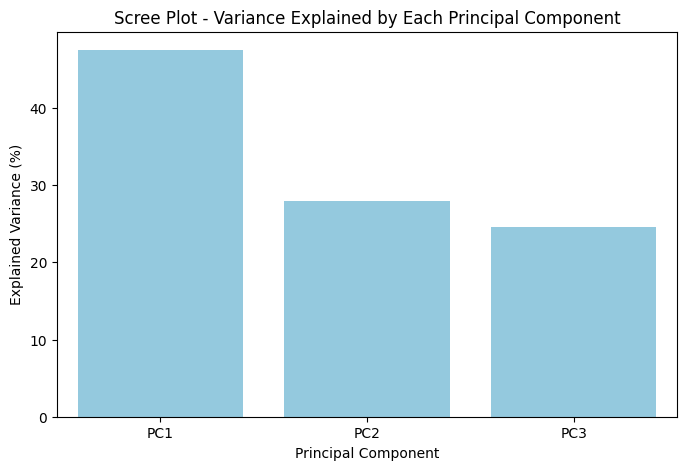

✅ PCA results exported to pca_results.json


In [ ]:

!pip install pandas scikit-learn matplotlib seaborn


import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import files


uploaded = files.upload()

with open("merged_weather_data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
years = df['year']
X = df.drop(columns=['year'])

#  Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#  Explained variance
explained_variance = pca.explained_variance_ratio_ * 100
components = [f"PC{i+1}" for i in range(len(explained_variance))]

#  Display Scree Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=components, y=explained_variance, color='skyblue')
plt.title('Scree Plot - Variance Explained by Each Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Component')
plt.show()

# Export for React
descriptions = [
    "Water levels and rainfall interaction",
    "Temperature impact on water levels",
    "Residual seasonal or humidity effects",
    "Other minor factors",
    "Negligible variance"
]

pca_result = [
    {
        "component": comp,
        "variance": round(var, 2),
        "description": descriptions[i] if i < len(descriptions) else "Other"
    }
    for i, (comp, var) in enumerate(zip(components, explained_variance))
]

with open("pca_results.json", "w") as f:
    json.dump(pca_result, f, indent=2)

print("✅ PCA results exported to pca_results.json")
